<a href="https://colab.research.google.com/github/lpgod/FTM/blob/26%2F6/FTM_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

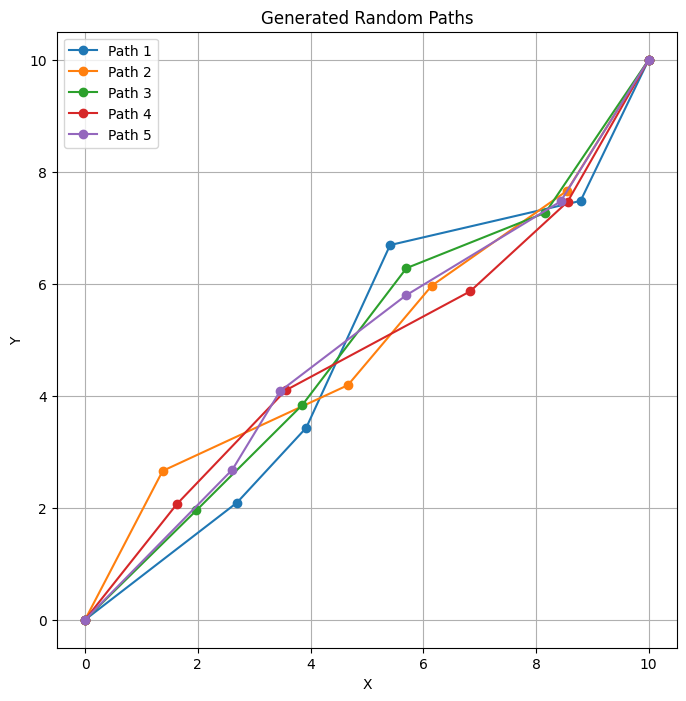

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from matplotlib.patches import Ellipse


# Parameters
n_objects = 5
n_intervals = 5
origin = np.array([0, 0])
destination = np.array([10, 10])


# Generate random paths (each row is a path for one object)
paths = np.zeros((n_objects, n_intervals + 1, 2))
for i in range(n_objects):
    paths[i, 0] = origin
    paths[i, -1] = destination
    for t in range(1, n_intervals):
        # Generate intermediate random points
        paths[i, t] = origin + (destination - origin) * t / n_intervals + np.random.randn(2) * 0.5

# Plot the generated paths
plt.figure(figsize=(8, 8))

for i, path in enumerate(paths):
    plt.plot(path[:, 0], path[:, 1], marker='o', label=f'Path {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Random Paths')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
e = 0.5  # Maximum allowable distance between line segments
MinLns = 2  # Minimum number of neighbors for a core line

Distance Matrix at Interval 0:
[[0.         0.35887364 0.18302506 0.26769853 0.14918934]
 [0.35887364 0.         0.23122475 0.16167739 0.30961132]
 [0.18302506 0.23122475 0.         0.09179954 0.24218388]
 [0.26769853 0.16167739 0.09179954 0.         0.29217419]
 [0.14918934 0.30961132 0.24218388 0.29217419 0.        ]]
Neighbors (within distance e=0.5) at Interval 0:
Line segment 0: Neighbors -> [0 1 2 3 4]
Line segment 1: Neighbors -> [0 1 2 3 4]
Line segment 2: Neighbors -> [0 1 2 3 4]
Line segment 3: Neighbors -> [0 1 2 3 4]
Line segment 4: Neighbors -> [0 1 2 3 4]
Clusters at Interval 0: [{0, 1, 2, 3, 4}]


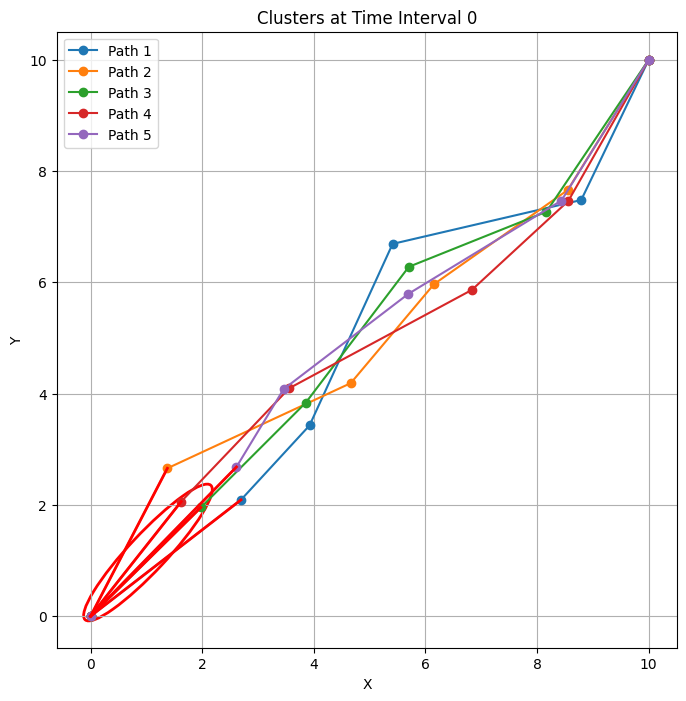

Distance Matrix at Interval 1:
[[0.         1.01281293 0.55610123 0.90538663 0.63163932]
 [1.01281293 0.         0.66385175 0.47914283 0.62791504]
 [0.55610123 0.66385175 0.         0.36744193 0.71566083]
 [0.90538663 0.47914283 0.36744193 0.         0.85301397]
 [0.63163932 0.62791504 0.71566083 0.85301397 0.        ]]
Neighbors (within distance e=0.5) at Interval 1:
Line segment 0: Neighbors -> [0]
Line segment 1: Neighbors -> [1 3]
Line segment 2: Neighbors -> [2 3]
Line segment 3: Neighbors -> [1 2 3]
Line segment 4: Neighbors -> [4]
Clusters at Interval 1: [{1, 3}, {2, 3}]


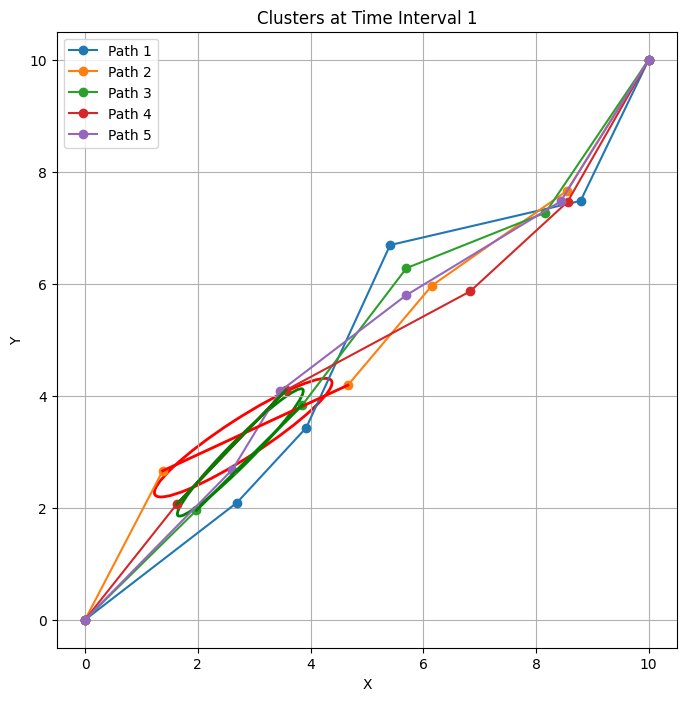

Distance Matrix at Interval 2:
[[0.         0.8350356  0.20589254 0.30582157 0.38390042]
 [0.8350356  0.         0.73987555 0.66366495 1.02510448]
 [0.20589254 0.73987555 0.         0.10792192 0.30674498]
 [0.30582157 0.66366495 0.10792192 0.         0.36183782]
 [0.38390042 1.02510448 0.30674498 0.36183782 0.        ]]
Neighbors (within distance e=0.5) at Interval 2:
Line segment 0: Neighbors -> [0 2 3 4]
Line segment 1: Neighbors -> [1]
Line segment 2: Neighbors -> [0 2 3 4]
Line segment 3: Neighbors -> [0 2 3 4]
Line segment 4: Neighbors -> [0 2 3 4]
Clusters at Interval 2: [{0, 2, 3, 4}]


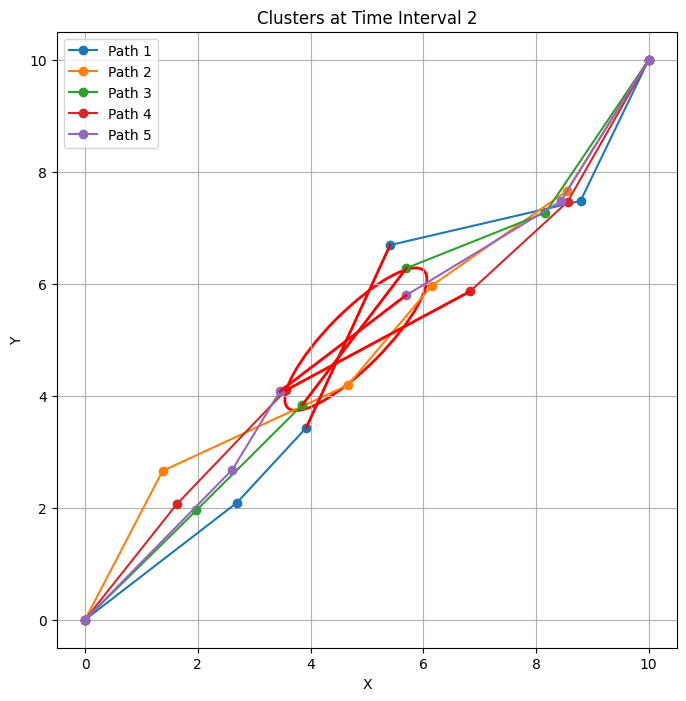

Distance Matrix at Interval 3:
[[0.         0.70243945 0.36670593 1.18491825 0.68761377]
 [0.70243945 0.         0.45404317 0.52732969 0.41374611]
 [0.36670593 0.45404317 0.         0.9808544  0.32093105]
 [1.18491825 0.52732969 0.9808544  0.         0.88692466]
 [0.68761377 0.41374611 0.32093105 0.88692466 0.        ]]
Neighbors (within distance e=0.5) at Interval 3:
Line segment 0: Neighbors -> [0 2]
Line segment 1: Neighbors -> [1 2 4]
Line segment 2: Neighbors -> [0 1 2 4]
Line segment 3: Neighbors -> [3]
Line segment 4: Neighbors -> [1 2 4]
Clusters at Interval 3: [{0, 2}, {1, 2, 4}]


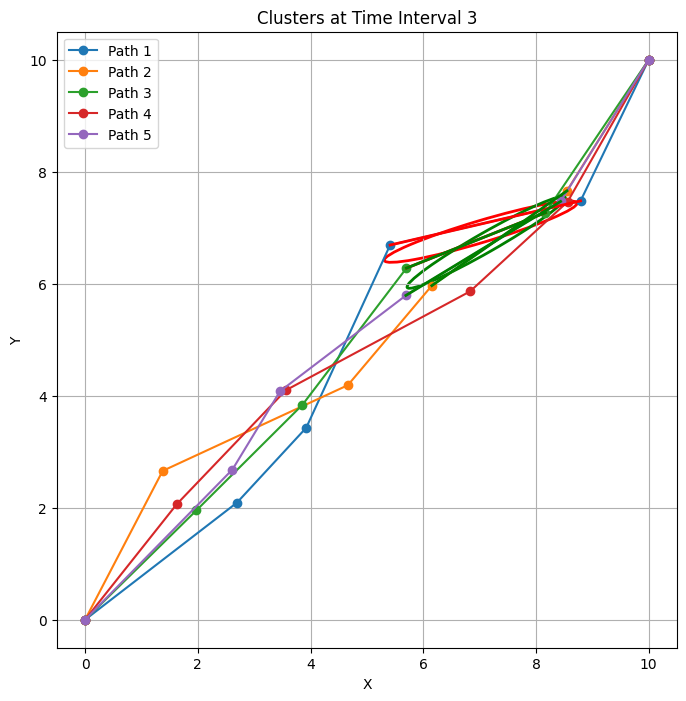

Distance Matrix at Interval 4:
[[0.         0.22577357 0.492941   0.17401328 0.26579104]
 [0.22577357 0.         0.40876502 0.14778708 0.1652805 ]
 [0.492941   0.40876502 0.         0.32723863 0.25119114]
 [0.17401328 0.14778708 0.32723863 0.         0.09232064]
 [0.26579104 0.1652805  0.25119114 0.09232064 0.        ]]
Neighbors (within distance e=0.5) at Interval 4:
Line segment 0: Neighbors -> [0 1 2 3 4]
Line segment 1: Neighbors -> [0 1 2 3 4]
Line segment 2: Neighbors -> [0 1 2 3 4]
Line segment 3: Neighbors -> [0 1 2 3 4]
Line segment 4: Neighbors -> [0 1 2 3 4]
Clusters at Interval 4: [{0, 1, 2, 3, 4}]


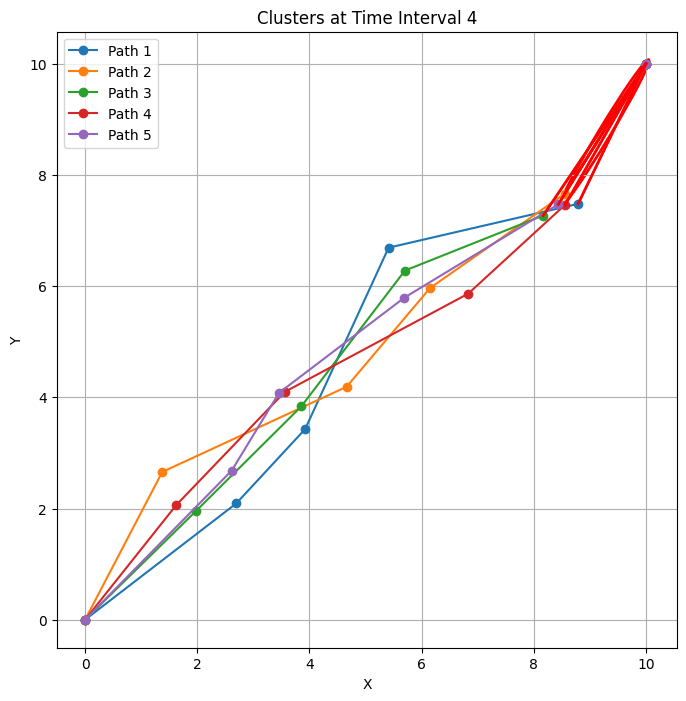

In [ ]:

def divide_line(start, end, L):
    # Start and end are numpy arrays representing the beginning and ending points
    C = 1  # Assume C is some constant, which you can modify as needed
    points = []

    for l in range(L + 1):
        sigma = C / (L + 1)
        x_coord = sigma * end[0] + (1 - sigma) * start[0]
        y_coord = sigma * end[1] + (1 - sigma) * start[1]
        points.append((x_coord, y_coord))

    return points


def calculate_distances(paths, interval, L):
    distance_matrix = np.zeros((n_objects, n_objects))

    for i, j in combinations(range(n_objects), 2):
        start_i, end_i = paths[i, interval], paths[i, interval + 1]
        start_j, end_j = paths[j, interval], paths[j, interval + 1]

        # Divide both line segments into L+1 parts
        line_i_points = divide_line(start_i, end_i, L)
        line_j_points = divide_line(start_j, end_j, L)

        # Compute the average distance between corresponding points on the lines
        dists = [np.sqrt((x1 - x2)**2 + (y1 - y2)**2) for (x1, y1), (x2, y2) in zip(line_i_points, line_j_points)]
        distance_matrix[i, j] = distance_matrix[j, i] = np.mean(dists)
    return distance_matrix


# Find neighbors of each line segment within distance e
def find_neighbors(dist_matrix, e):
    neighbors = []
    for i in range(n_objects):
        neighbor_list = np.where(dist_matrix[i] <= e)[0]
        neighbors.append(neighbor_list)
    return neighbors


# Cluster line segments based on MinLns
def cluster_segments(neighbors, MinLns):
    clusters = []
    visited = set()

    for i in range(n_objects):
        if i not in visited and len(neighbors[i]) >= MinLns:
            cluster = set(neighbors[i])
            visited.update(cluster)
            clusters.append(cluster)

    return clusters


# Function to calculate the center and size of the ellipse for a cluster
def get_cluster_ellipse(cluster, paths, interval):
    cluster_points = np.array([paths[obj, interval] for obj in cluster] +
                              [paths[obj, interval + 1] for obj in cluster])
    center = np.mean(cluster_points, axis=0)
    cov = np.cov(cluster_points, rowvar=False)

    # Eigenvalues and eigenvectors for the ellipse axes
    eigvals, eigvecs = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

    # Width and height of the ellipse
    width, height = 2 * np.sqrt(eigvals)
    return center, width, height, angle


# Plot the clusters with ellipses and lines around them
def plot_clusters(clusters, paths, interval):
    plt.figure(figsize=(8, 8))

    for i, path in enumerate(paths):
        plt.plot(path[:, 0], path[:, 1], marker='o', label=f'Path {i+1}')

    colors = ['r', 'g', 'b', 'c', 'm', 'y']

    for i, cluster in enumerate(clusters):
        cluster_color = colors[i % len(colors)]

        # Draw lines around the cluster
        for obj in cluster:
            plt.plot(paths[obj, interval:interval+2, 0], paths[obj, interval:interval+2, 1], color=cluster_color, lw=2)

        # Draw an ellipse around the cluster
        center, width, height, angle = get_cluster_ellipse(cluster, paths, interval)
        ellipse = Ellipse(xy=center, width=width, height=height, angle=angle, edgecolor=cluster_color, facecolor='none', lw=2)
        plt.gca().add_patch(ellipse)

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Clusters at Time Interval {interval}')
    plt.grid(True)
    plt.show()


# Main routine to calculate distances, find neighbors, and plot clusters for each time interval
for interval in range(n_intervals):
    dist_matrix = calculate_distances(paths, interval, 3)
    neighbors = find_neighbors(dist_matrix, e)

    # Print the distance matrix and neighbors for this interval
    print(f"Distance Matrix at Interval {interval}:")
    print(dist_matrix)

    print(f"Neighbors (within distance e={e}) at Interval {interval}:")
    for i, neighbor_list in enumerate(neighbors):
        print(f"Line segment {i}: Neighbors -> {neighbor_list}")

    clusters = cluster_segments(neighbors, MinLns)
    print(f"Clusters at Interval {interval}: {clusters}")
    plot_clusters(clusters, paths, interval)

